# importing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Get data

In [2]:
dataset = pd.read_csv(r'datasets\Mall_Customers.csv')

dataset = dataset.iloc[:,[3,4]].values
print(dataset)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# find right number of clusters using elbow method

### using dendrogram

* options for method:
 * methods=['single','complete','average','centroid','median','ward','weighted']
 
* options for metric:
 * metrics=[customFunctions]
 * e.g.
     
        def dist3(x,y):
            '''absolute distance'''
            return abs(x[0]-y[0])+abs(x[1]-y[1])

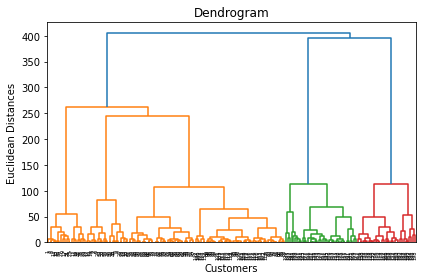

In [6]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(dataset, method = 'ward',metric='euclidean'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.tight_layout()

### using elbow method

In [53]:
from sklearn.cluster import AgglomerativeClustering
import scipy.stats as stats

In [55]:
lst_f=[]

#vary number of clusters from 2 to 9
for i in range(2,10):
    print("number of clusters: ",i)
    hc = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    y_hc=hc.fit_predict(dataset)
    df=pd.concat([pd.DataFrame(dataset),pd.DataFrame({'target':y_hc})],axis=1)
    print("following contains 3 entries of the data and the newly found out target:")
    print(df.head(3))
    # from groups of the values given by the target, i.e. clusters
    grp=df.groupby('target')
    #create a list to store the data for each cluster
    lst=[]
    for i, v in grp.groups.items():
        print("storing values of cluster number: ",i)
        lst.append(v)
    
    # store the overall measure of the clustered data, it measures how wee the data is separated
    fvalue,pvalue=stats.f_oneway(*lst)
    lst_f.append(fvalue)
    print("\n")

number of clusters:  2
following contains 3 entries of the data and the newly found out target:
    0   1  target
0  15  39       1
1  15  81       1
2  16   6       1
storing values of cluster number:  0
storing values of cluster number:  1


number of clusters:  3
following contains 3 entries of the data and the newly found out target:
    0   1  target
0  15  39       0
1  15  81       0
2  16   6       0
storing values of cluster number:  0
storing values of cluster number:  1
storing values of cluster number:  2


number of clusters:  4
following contains 3 entries of the data and the newly found out target:
    0   1  target
0  15  39       0
1  15  81       3
2  16   6       0
storing values of cluster number:  0
storing values of cluster number:  1
storing values of cluster number:  2
storing values of cluster number:  3


number of clusters:  5
following contains 3 entries of the data and the newly found out target:
    0   1  target
0  15  39       4
1  15  81       3
2  16  

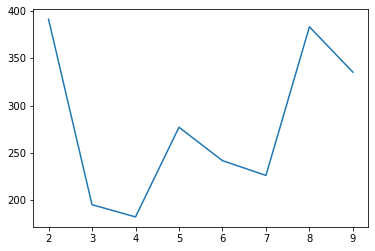

In [65]:
plt.plot([2,3,4,5,6,7,8,9],lst_f)

## Note: choose the first upper elbow, in this case 5, you can chooose the 2nd uppser elbow too

## Note: study noth dendrogram and elbow to find out the right number of clusters

# Final model

In [1]:
from sklearn.cluster import AgglomerativeClustering

In [66]:

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

y_hc = hc.fit_predict(dataset)

print("predictions: ",y_hc)

predictions:  [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# Vizualize

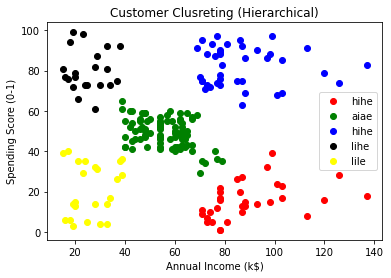

In [67]:
plt.scatter(dataset[y_hc==0,0],dataset[y_hc==0,1], c = 'red', label = 'hihe')
plt.scatter(dataset[y_hc==1,0],dataset[y_hc==1,1], c = 'green', label = 'aiae')
plt.scatter(dataset[y_hc==2,0],dataset[y_hc==2,1], c = 'blue', label = 'hihe')
plt.scatter(dataset[y_hc==3,0],dataset[y_hc==3,1], c = 'black', label = 'lihe')
plt.scatter(dataset[y_hc==4,0],dataset[y_hc==4,1], c = 'yellow', label = 'lile')
plt.title('Customer Clusreting (Hierarchical)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (0-1)')
plt.legend(loc='best')
plt.show()